# SE-2200E Notebook 4: A First Prediction

Ningsong Shen

February 18, 2021

## Summary

Using our cleaned data, we separate into train, test, validate sets and run some simple algorithms

## Model Usage
Get a trained model paramaters and use it to predict live data from transit feeds using the AWS vm.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv('../clean_data/sample_data.csv').drop_duplicates().sort_values(["trip_id", "start_date", "stop_sequence"], ignore_index=True)
df.head()

trip_id  start_date  route_id  stop_sequence  vehicle_id  \
0  1330705    20201105         4              1      3310.0   
1  1330705    20201105         4              2      3310.0   
2  1330705    20201105         4              3      3310.0   
3  1330705    20201105         4              4      3310.0   
4  1330705    20201105         4              5      3310.0   

   scheduled_departure_time  real_departure_time  
0                       0.0                  0.0  
1                      24.0               -171.0  
2                      44.0               -151.0  
3                      73.0               -122.0  
4                     108.0                -87.0

## A Linear Regression

In [11]:
df1 = df.sample(50000)
df1.shape

(50000, 7)

In [15]:
X = df1["scheduled_departure_time"].values.reshape(-1, 1) # We add the stop_sequence as a feature, although they might be correlated
Y = df1["real_departure_time"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

(0.0, 8000.0)

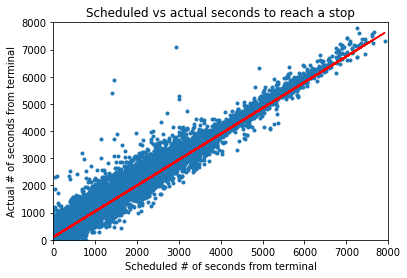

In [18]:
plt.scatter(X, Y, marker=".")
plt.plot(X, Y_pred, color='red', )
plt.title("Scheduled vs actual seconds to reach a stop")
plt.xlabel("Scheduled # of seconds from terminal")
plt.ylabel("Actual # of seconds from terminal")
plt.xlim([0, 8000])
plt.ylim([0, 8000])

Above, we used the entire dataset to see trends in arrival times compared to scheduled times. 

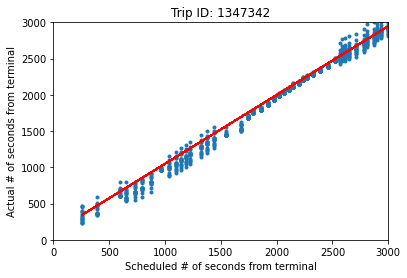

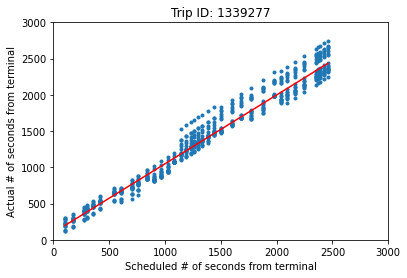

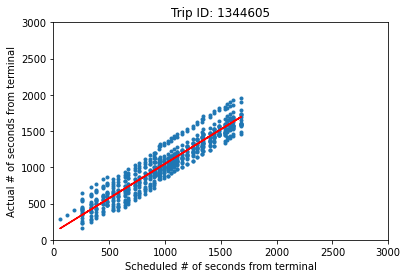

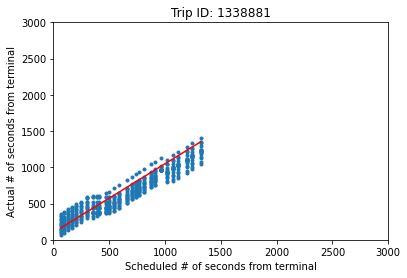

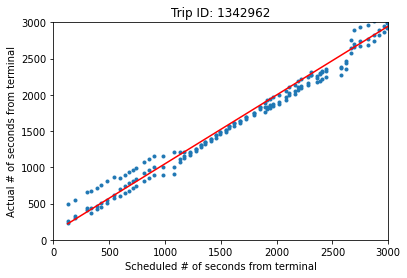

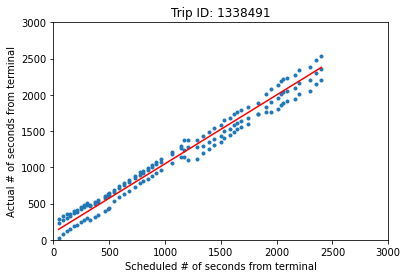

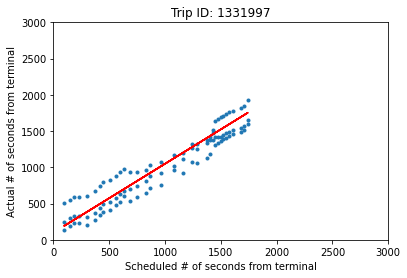

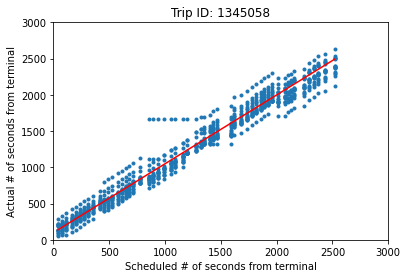

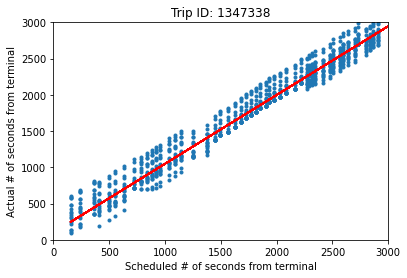

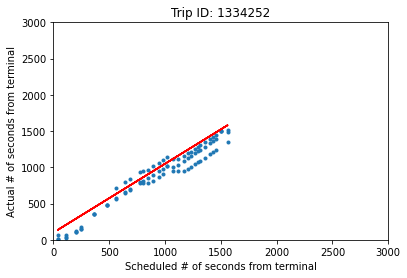

In [59]:
import random
trip_ids = df["trip_id"].unique()
for i in random.sample(range(len(trip_ids)), 50):
    cur_df = df.loc[(df['trip_id'] == trip_ids[i])]
    X = cur_df["scheduled_departure_time"].values.reshape(-1, 1)
    Y = cur_df["real_departure_time"].values.reshape(-1, 1)
    # We instead use the trained model based on the entire dataset
    # linear_regressor = LinearRegression()
    # linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    plt.figure(i)
    plt.scatter(X, Y, marker=".")
    plt.plot(X, Y_pred, color='red')
    plt.title("Trip ID: " + str(trip_ids[i]))
    plt.xlabel("Scheduled # of seconds from terminal")
    plt.ylabel("Actual # of seconds from terminal")
    plt.xlim([0, 3000])
    plt.ylim([0, 3000])